In [15]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

features, true_labels = make_blobs(n_samples=200, centers=3,cluster_std=2.75, random_state=42)
x=1
print(x)

1


In [11]:
make_blobs()

(array([[ 6.71343885,  4.41390367],
        [-5.69932003,  1.71045806],
        [ 6.71540458,  6.59434502],
        [-4.98626455,  1.86983193],
        [-3.62934932,  4.99473136],
        [-4.08816532,  4.22064434],
        [-5.61885329,  3.79822444],
        [ 5.22448409,  4.67400515],
        [-4.30560753,  2.9113612 ],
        [-5.34660491,  4.9728174 ],
        [ 5.26917136,  4.49683065],
        [-6.08820878,  2.47087978],
        [-4.94510742,  2.00627668],
        [-7.89350556,  1.67327871],
        [-4.79331907,  1.64545186],
        [ 6.54113461,  3.9214143 ],
        [-4.60866208,  1.55499283],
        [ 7.17204608,  6.0780061 ],
        [-6.95185665,  4.80337444],
        [-3.69384833,  3.03382783],
        [-4.55966188,  3.00483968],
        [-3.41020285,  4.17521707],
        [-4.70760454,  2.11692931],
        [-4.74377316,  3.63362033],
        [ 5.36608487,  5.8642098 ],
        [ 5.63847724,  5.01665121],
        [ 7.63904907,  3.18372171],
        [ 5.74267788,  4.595

In [12]:
x=1
print(x)


1


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


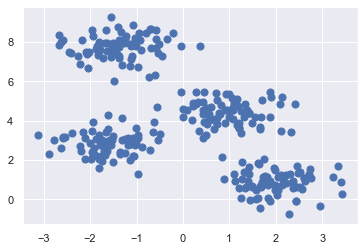

In [28]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

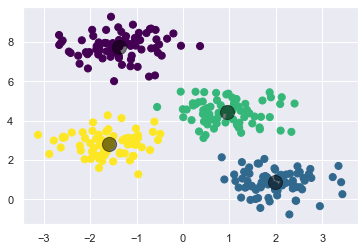

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

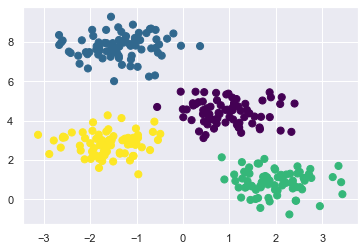

In [29]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');